In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df.describe()

In [7]:
numeric_features = [feature for feature in df.columns 
                    if df[feature].dtype != "O" and not set(df[feature].unique()).issubset({0, 1})]

categorical_features = [feature for feature in df.columns 
                        if df[feature].dtype == "O" or set(df[feature].unique()).issubset({0, 1})]

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 2 numerical features: ['tenure', 'MonthlyCharges']

We have 19 categorical features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [9]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values if necessary (for example, with 0)
df['TotalCharges'].fillna(0, inplace=True)

# Convert to int
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
numeric_features = [feature for feature in df.columns 
                    if df[feature].dtype != "O" and not set(df[feature].unique()).issubset({0, 1})]

categorical_features = [feature for feature in df.columns 
                        if df[feature].dtype == "O" or set(df[feature].unique()).issubset({0, 1})]

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges']

We have 18 categorical features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64
---------------------------
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
---------------------------
SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64
---------------------------
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
---------------------------
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
---------------------------
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
---------------------------
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float6

### Univarient analysis for numerical features


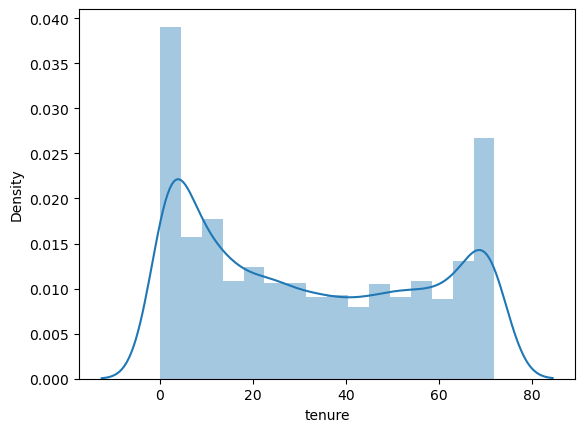

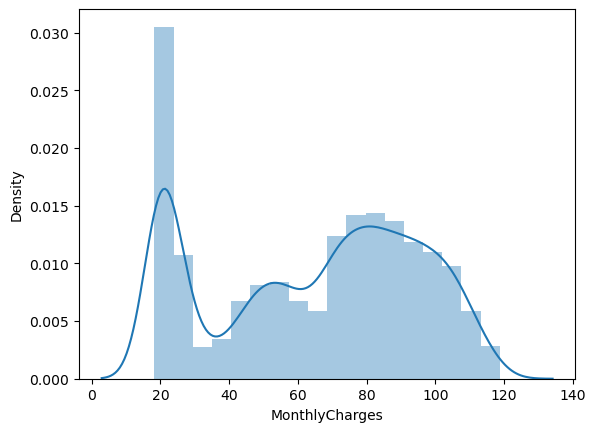

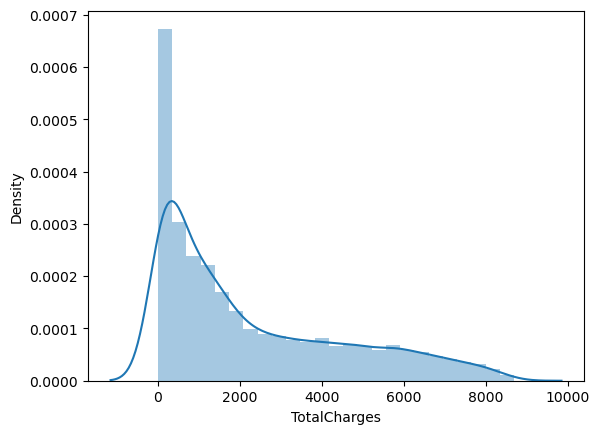

In [52]:
for col1 in numeric_features:
    sns.distplot(df[col1])
    plt.show()

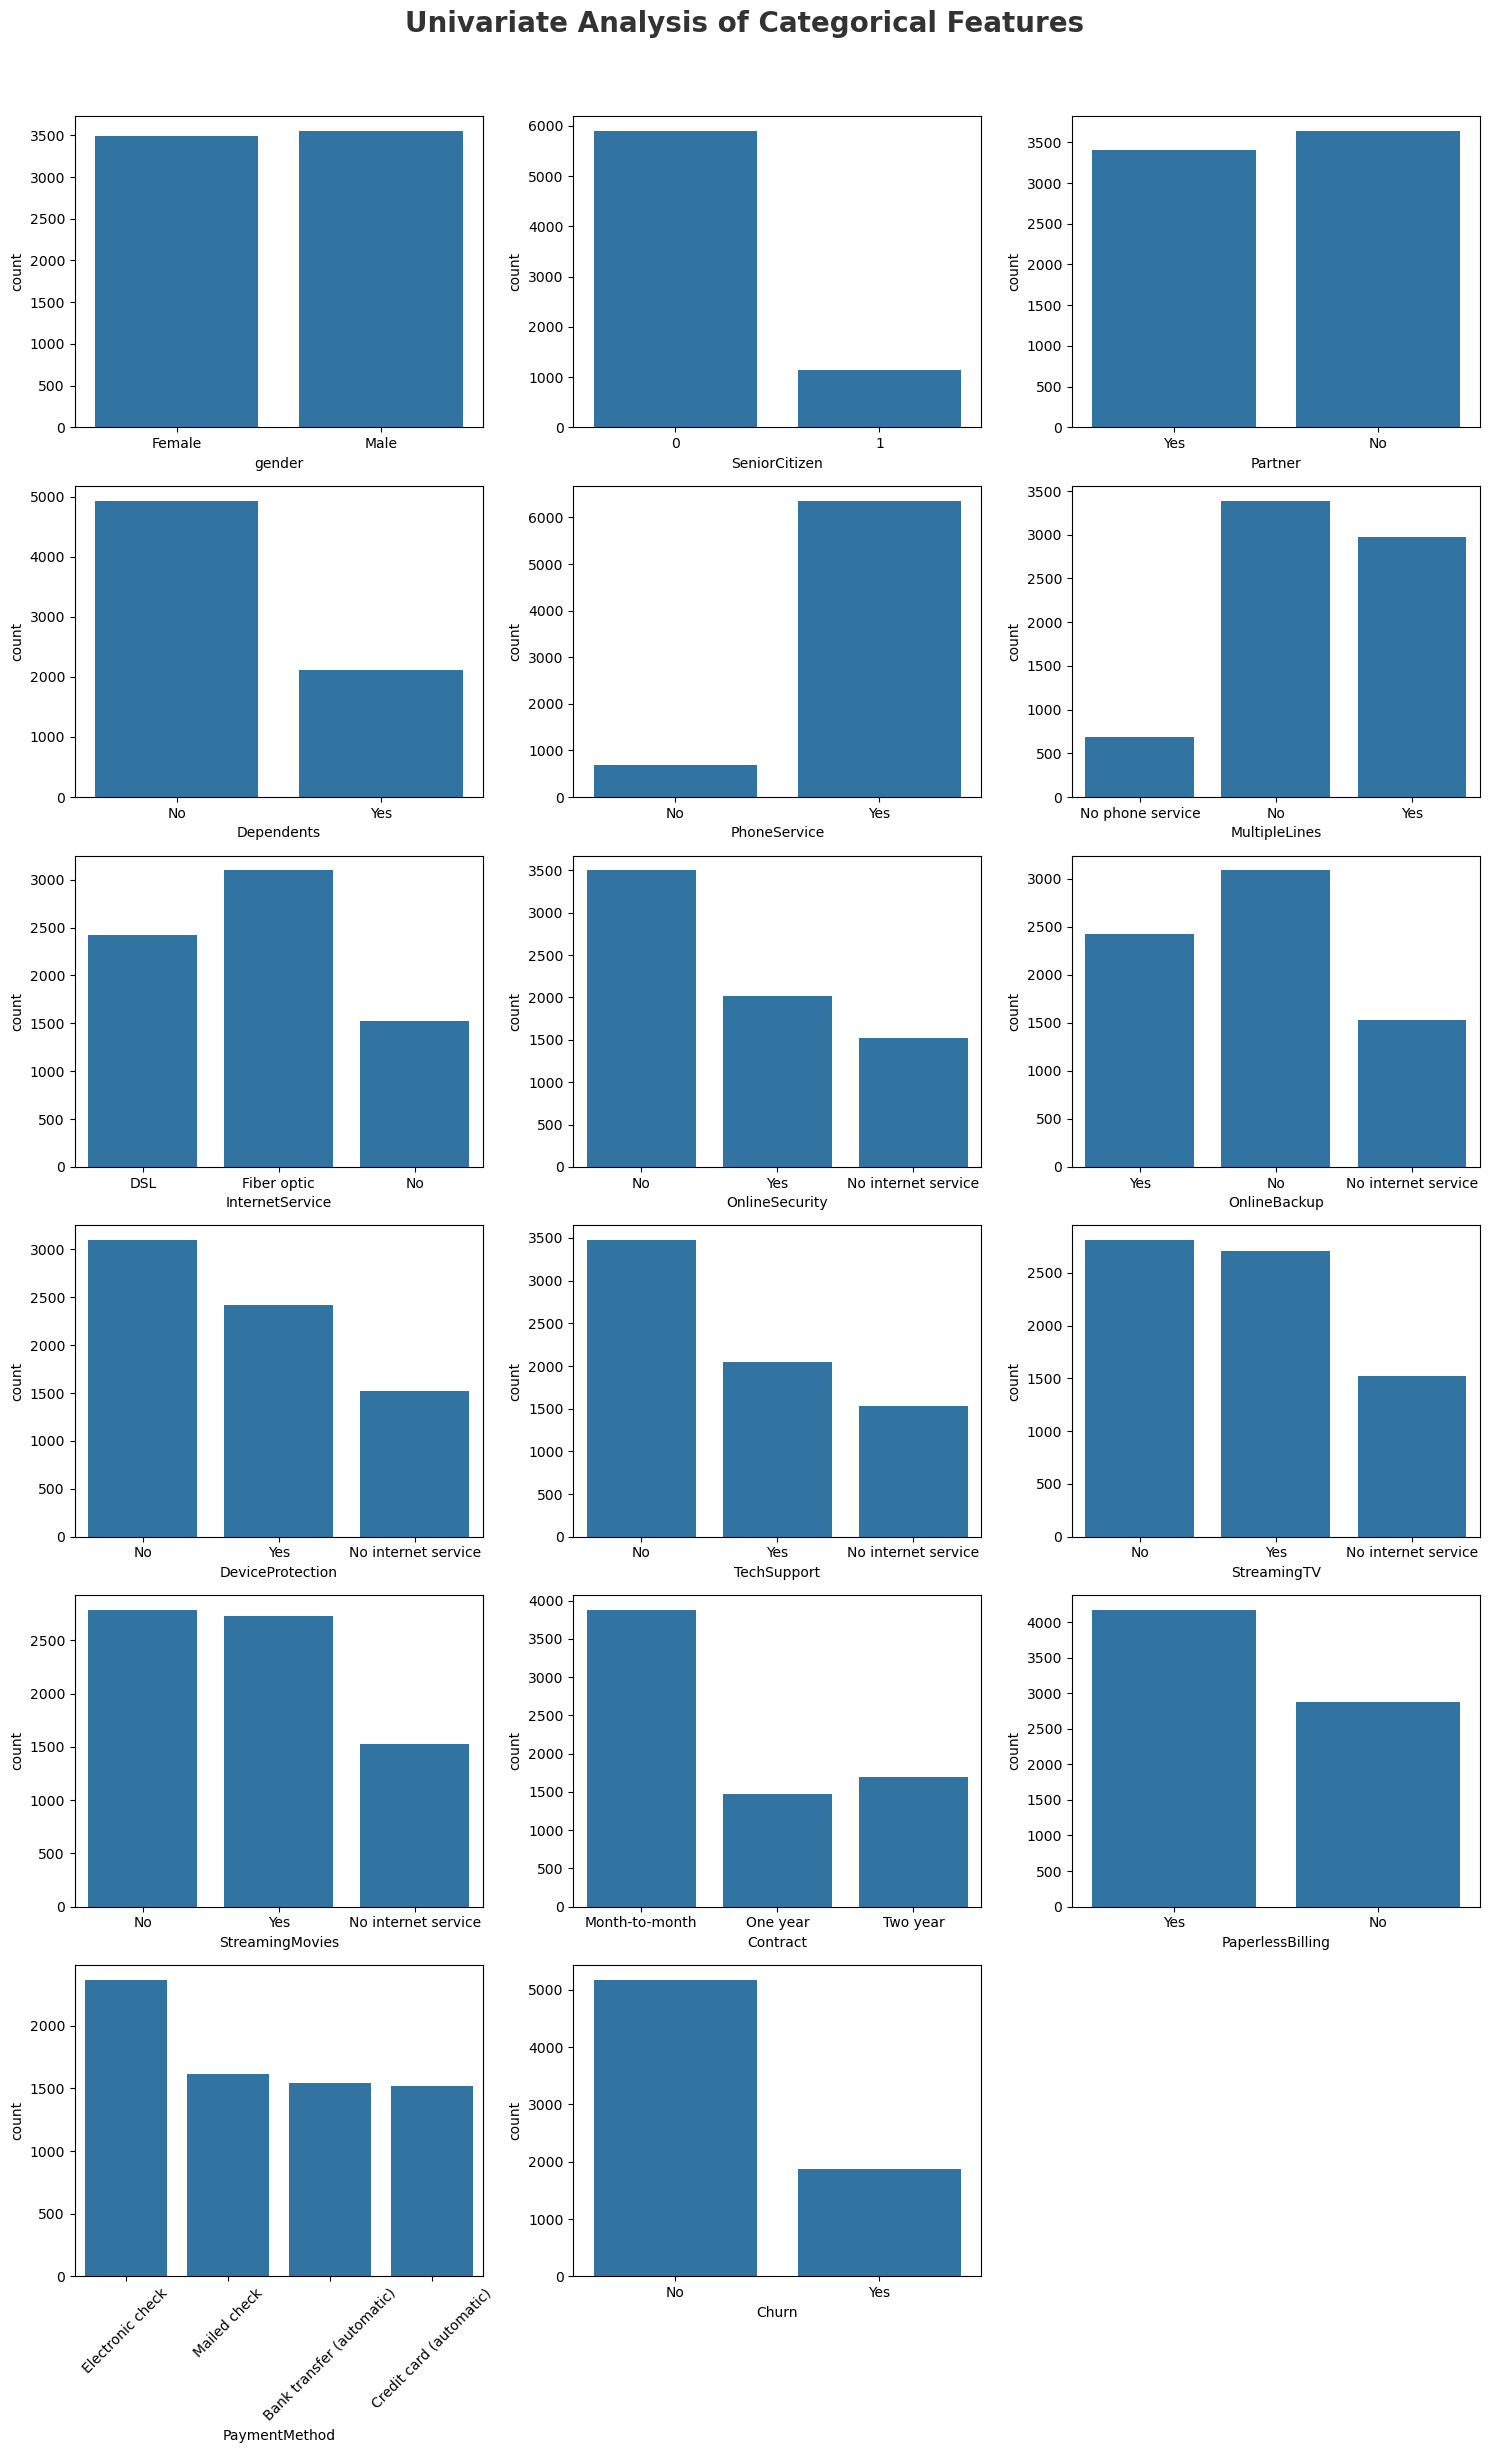

In [21]:
categorical_features.remove('customerID')
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

plt.figure(figsize=(15, num_rows * 4))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    if categorical_features[i] == 'PaymentMethod':
        plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# Chi-Squared Test for Categorical Features

The **Chi-Squared Test** (also called the **χ² test**) is a statistical hypothesis test used to examine the relationship between two categorical variables.

In this analysis, we will test the correlation between the categorical features in our dataset and the **Target Column** (`case_status`).

---

### **Hypotheses**

- **Null Hypothesis (H₀)**: The feature is independent of the target column (**no correlndent}}
  \]

- **Alternative Hypothesis (H₁)**: The feature and the target column are not independent (
 correlated}}
  \]

---

### **Why Use the Chi-Squared Test?**

The chi-squared statistic helps us evaluate the relationship between two categorical variables by comparing the observed frequency of values in the data against the expected frequency (if the variables were independent). 

If the calculated χ² statistic is significantly large, we reject the null hypothesis, indicating a correlation between the fe
ture the two variables were independent)

---

### **Next Steps**

We will apply the Chi-Squared test to all categorical features and the target column (`case_status`) to assess their correlation.


In [25]:
from scipy.stats import chi2_contingency
categorical_features = [col for col in categorical_features if col in df.columns and col != 'customerID']

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data={'Column': categorical_features, 'Hypothesis Result': chi2_test})
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,SeniorCitizen,Reject Null Hypothesis
2,Partner,Reject Null Hypothesis
3,Dependents,Reject Null Hypothesis
4,PhoneService,Fail to Reject Null Hypothesis
5,MultipleLines,Reject Null Hypothesis
6,InternetService,Reject Null Hypothesis
7,OnlineSecurity,Reject Null Hypothesis
8,OnlineBackup,Reject Null Hypothesis
9,DeviceProtection,Reject Null Hypothesis


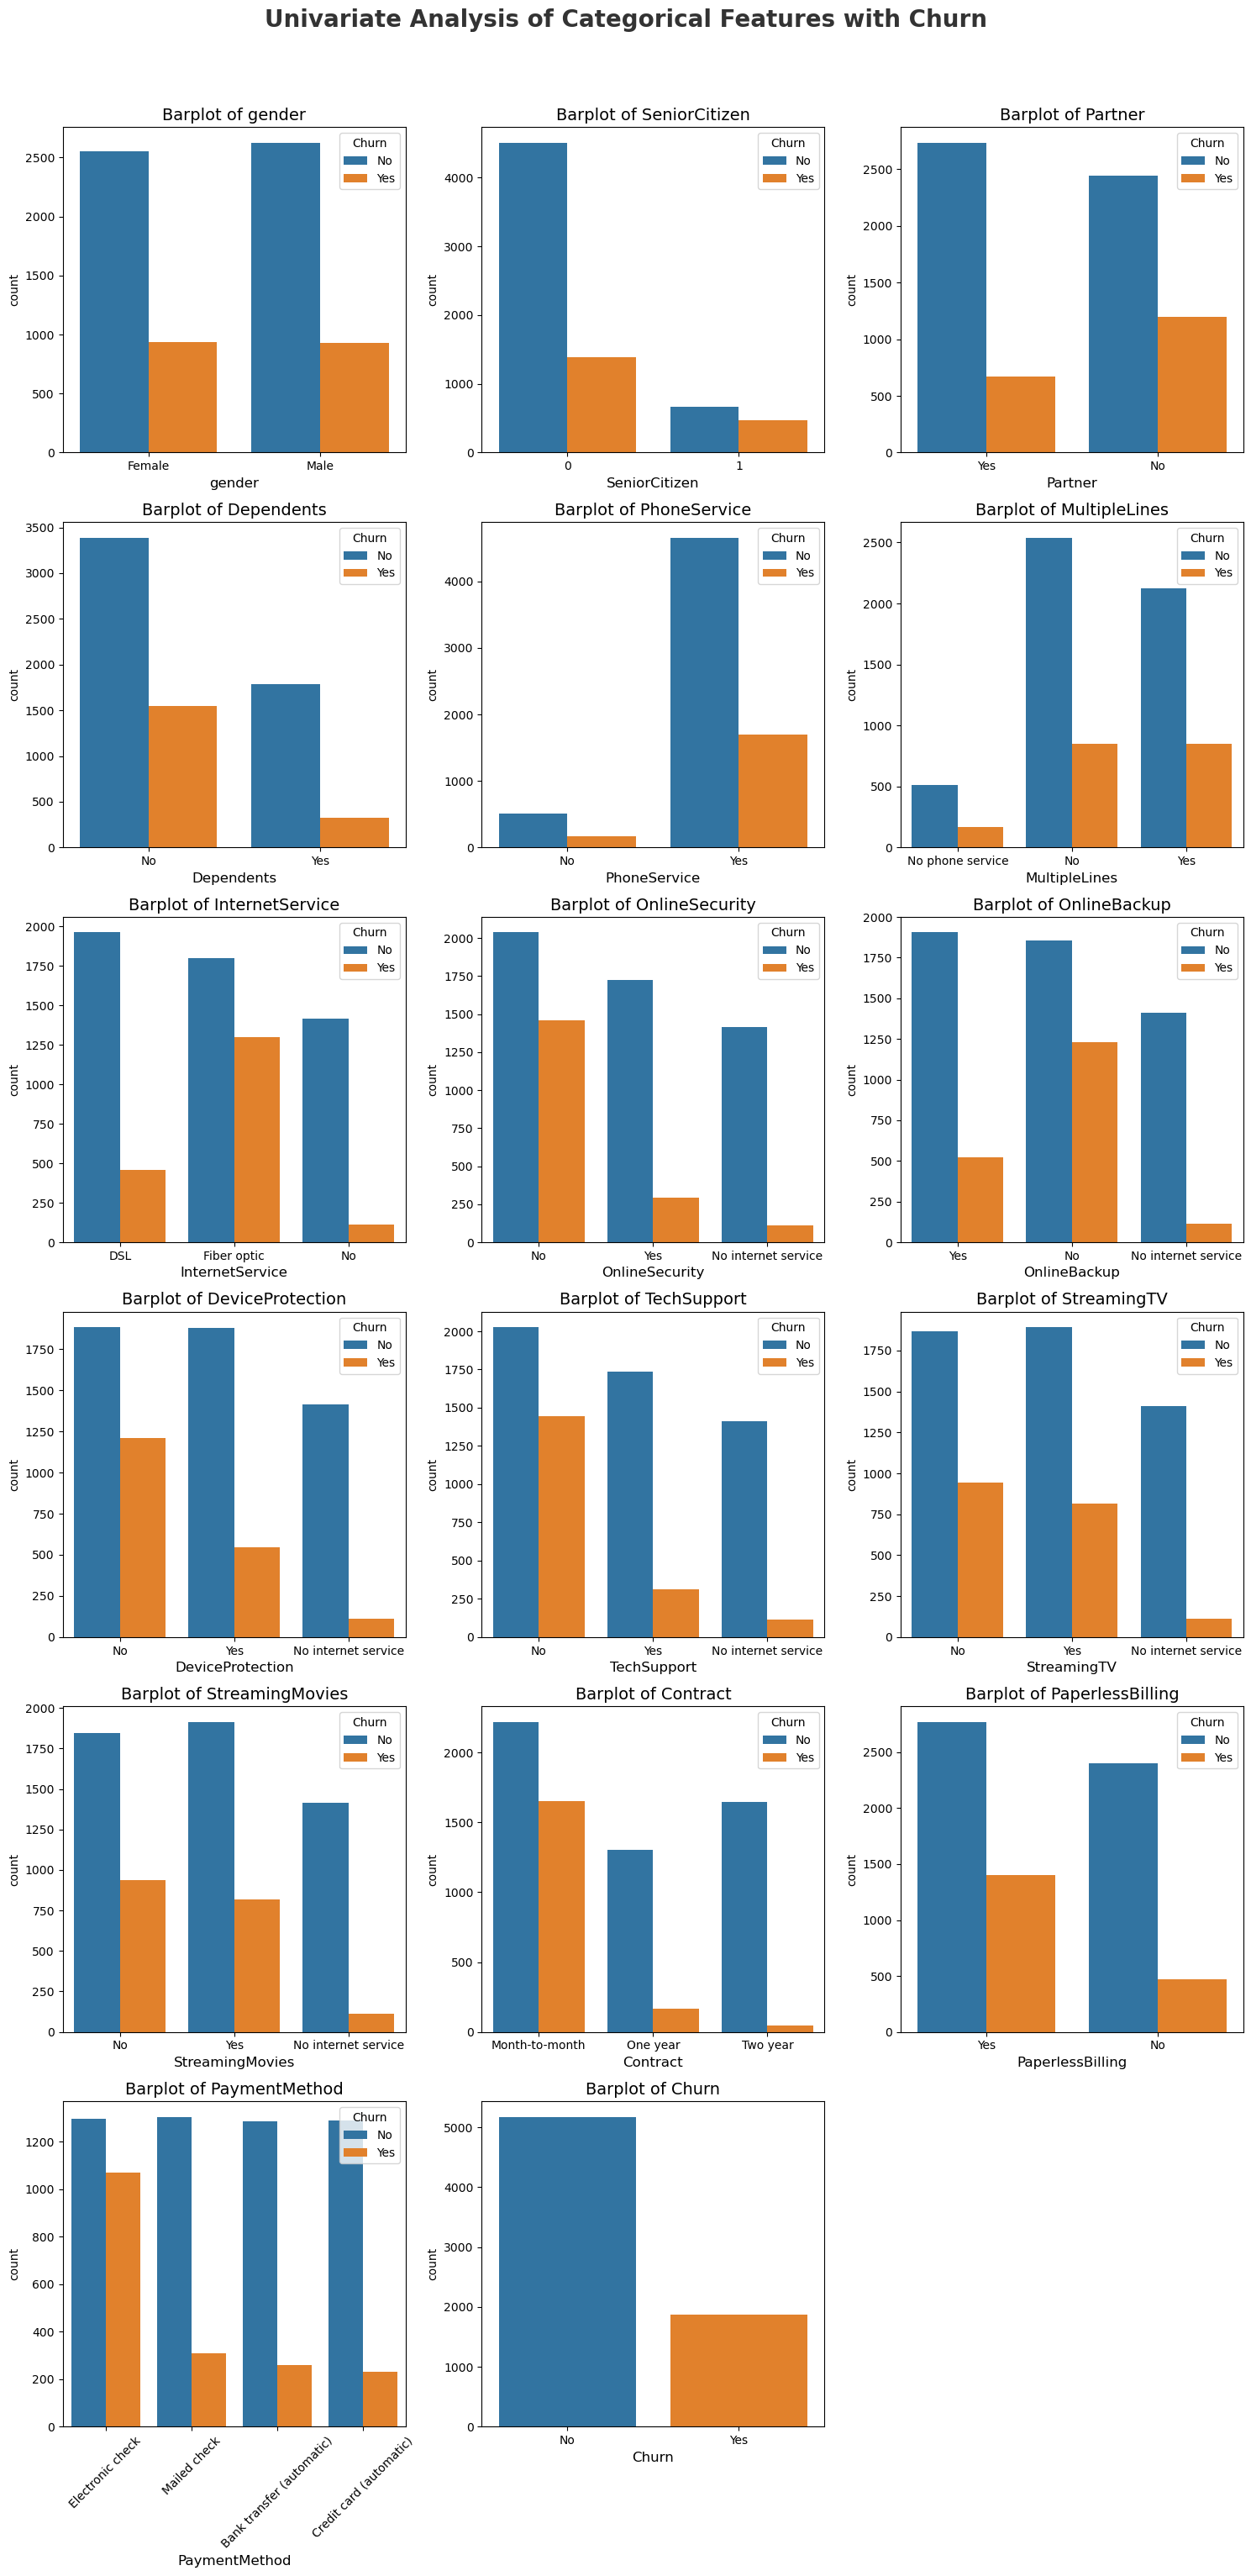

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'customerID' in categorical_features:
    categorical_features.remove('customerID')

num_features = len(categorical_features)
num_cols = 3  
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0) 

plt.figure(figsize=(15, num_rows * 5)) 
plt.suptitle('Univariate Analysis of Categorical Features with Churn', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[col], hue=df['Churn'], palette=['#1f77b4', '#ff7f0e'])  
    
    plt.title(f'Barplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    
    if col == 'PaymentMethod':
        plt.xticks(rotation=45)
    
    plt.tight_layout() 

plt.show()


## Insights from Categorical Features

1. **Gender**: Both male and female customers have approximately the same number of those who churn.

2. **Senior Customers**: Senior customers are more prone to leave the company compared to non-seniors.

3. **Partner Status**: Customers who don't have a partner tend to leave the company compared to those who do.

4. **Dependents**: Customers who leave the company generally do not have dependents, while those who have dependents are less likely to leave.

5. **Phone Service & Multiple Lines**: Across the categories of `PhoneService` and `MultipleLines`, customers show the same proportion for those who leave the company.

6. **Internet Service**: Customers who use fiber optic as their `InternetService` exhibit the highest churn rate compared to other internet service methods.

7. **Online Services**: Customers without `OnlineSecurity`, `OnlineBackup`, `OnlineProtection`, and `TechSupport` show a higher probability of churning compared to their counterparts who do have these services.

8. **Streaming Services**: The features `StreamingMovies` and `StreamingTV` show the same churn rate.

9. **Paperless Billing**: Customers who prefer paperless billing have a higher probability of churn compared to those who do not.

10. **Transaction Method**: Customers who use `ElectronicChecks` for their transactions within the company show a greater tendency to leave compared to those who use other payment methods.


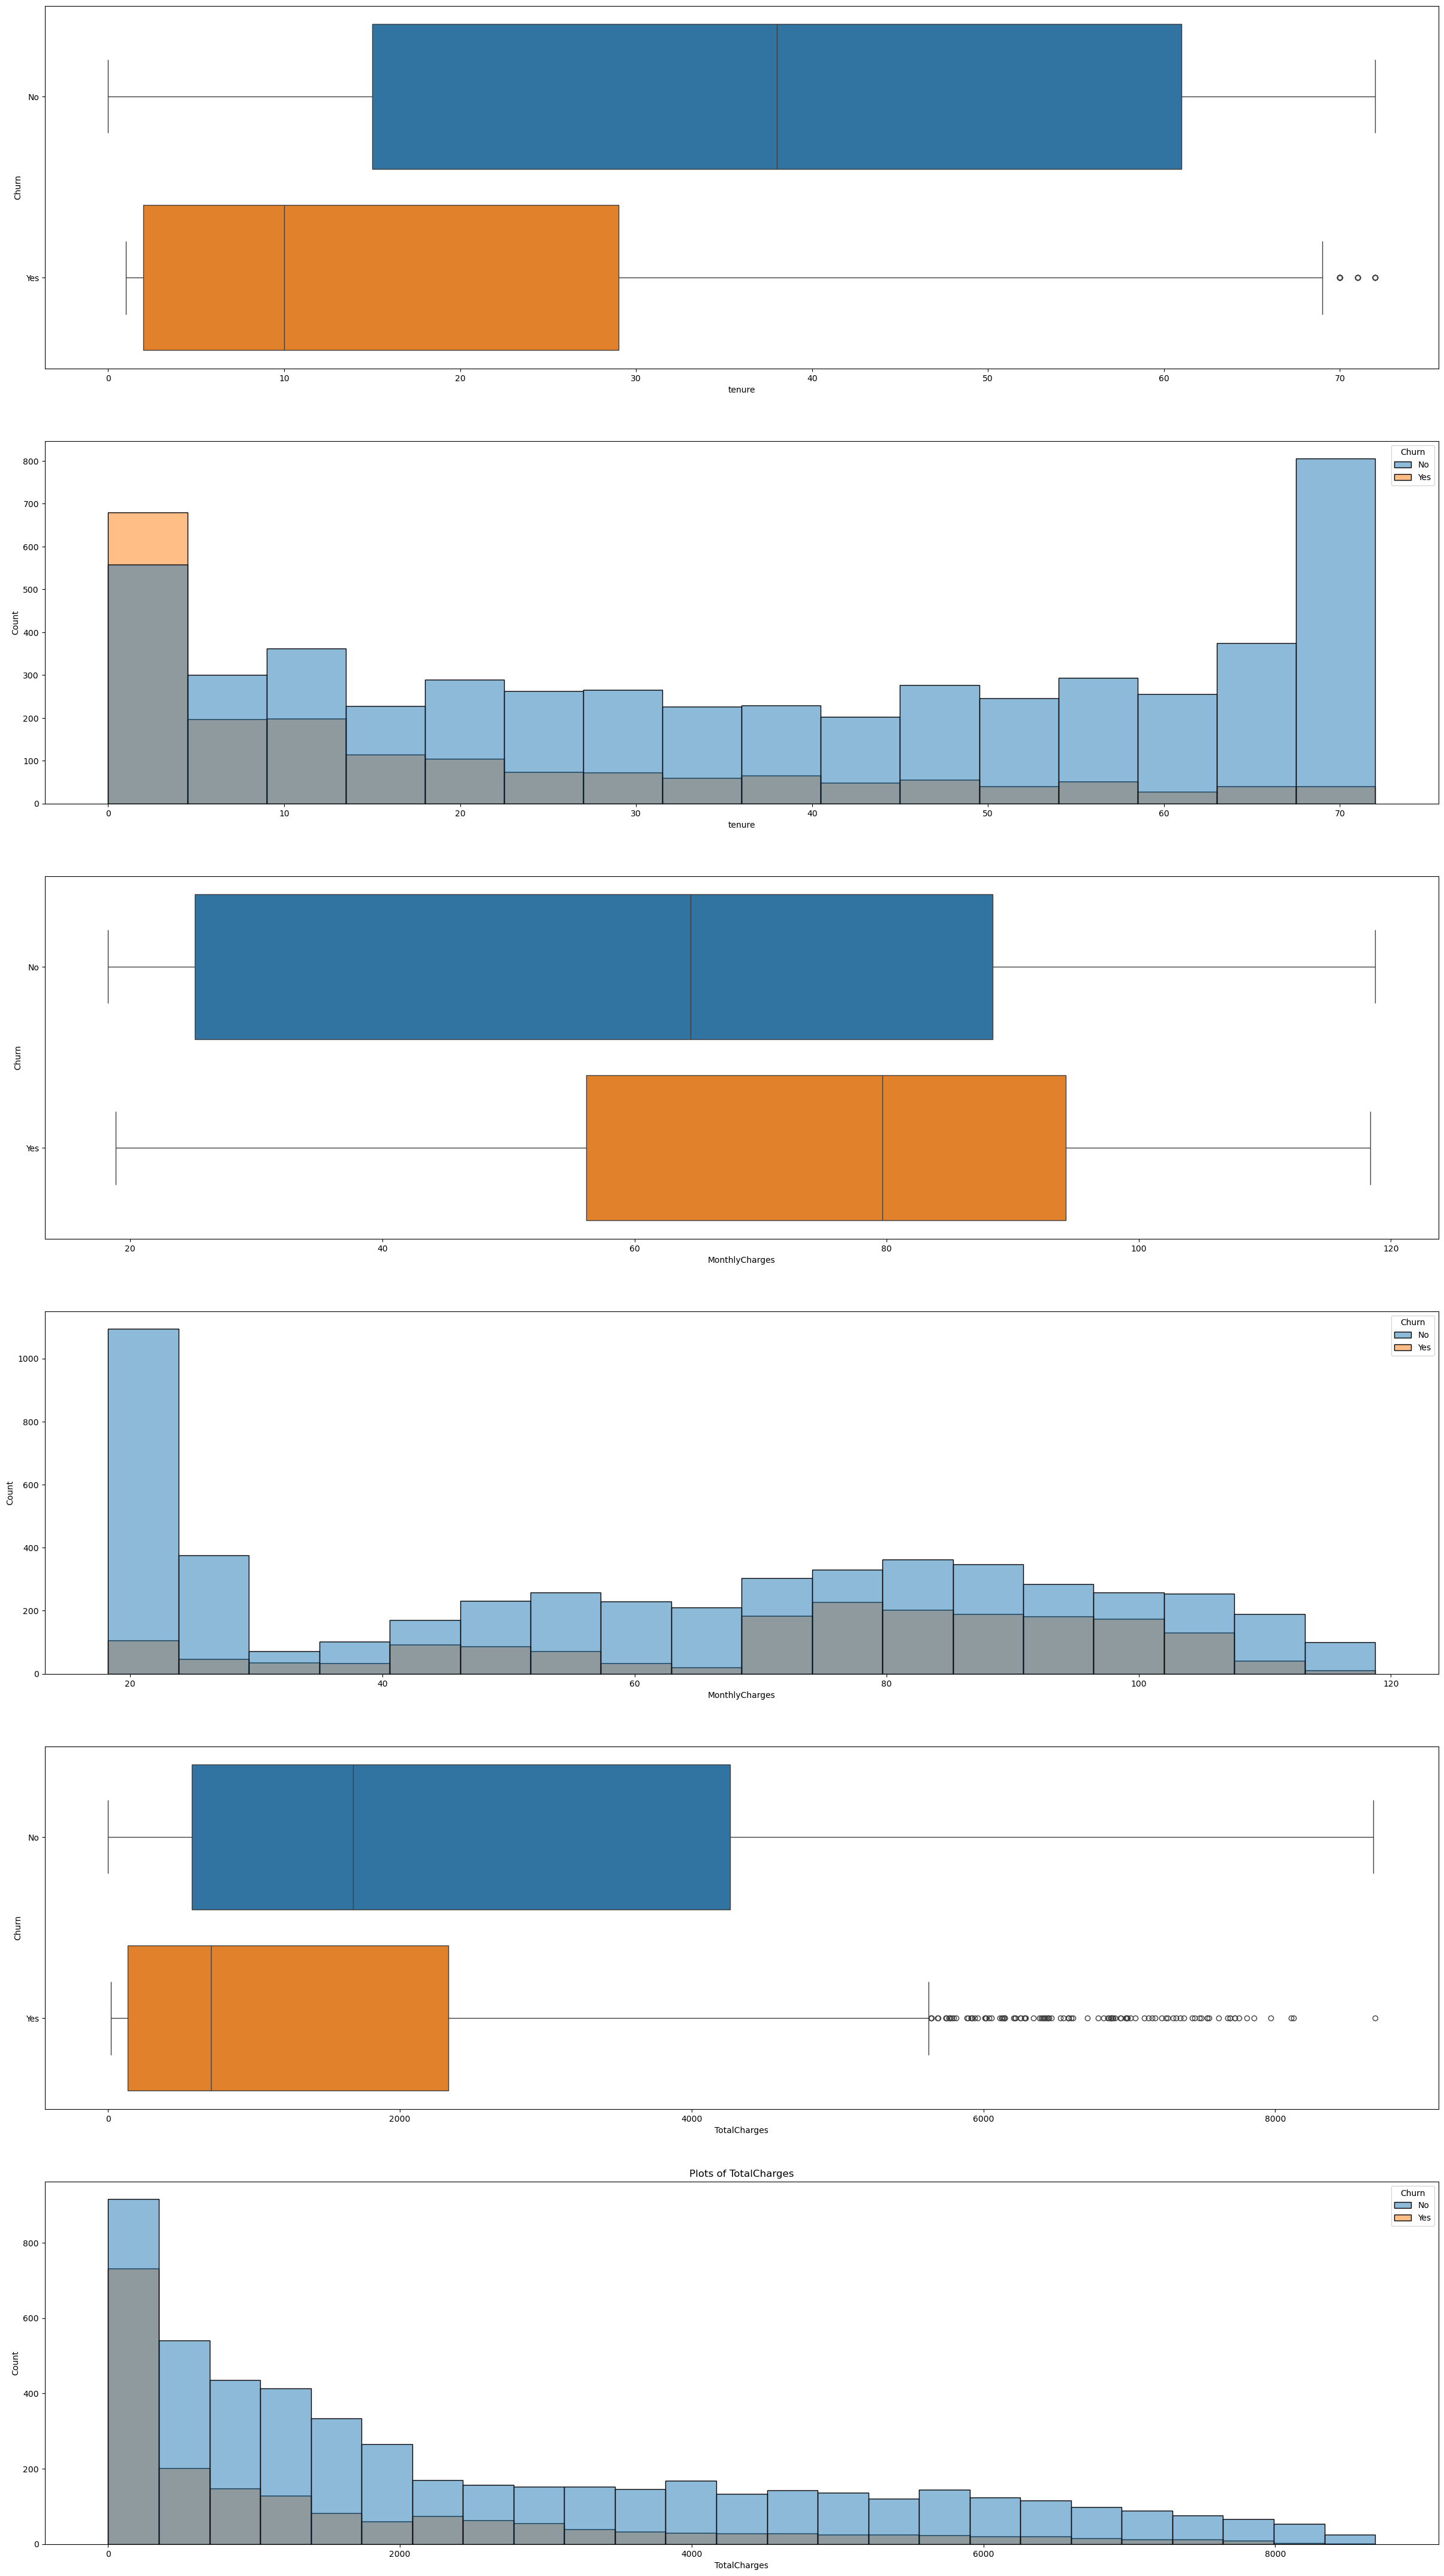

In [58]:
fig, ax = plt.subplots(6, figsize=(30, 55))
j=0
for i in numeric_features:
    plt.title("Plots of "+i)
    sns.boxplot(data=df, x=i, y="Churn", ax=ax[j], hue="Churn")
    sns.histplot(data=df, x=i, ax=ax[j+1], hue="Churn")
    j=j+2
plt.show()

## Insights from numerical features 

1. For variables **tenure** and **TotalCharges**, the **Churn** follows the same pattern; many customers leave very early and with small **TotalCharges**, respectively, compared to the rest of their respective populations.

2. The opposite happens with the **MonthlyCharges**; customers who **Churn** will leave the company when the **MonthlyCharges** are getting above 70 dollars.
s.